In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helper import load_folder,seconds_to_hhmmss

In [2]:
df = load_folder('2014')

In [3]:
len(df)

8081216

In [7]:
df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')
df['stoptime'] = pd.to_datetime(df['stoptime'], errors='coerce')
df = df.dropna(subset=['starttime', 'stoptime'])

In [6]:
df.iloc[866167]#.drop(# to drop

tripduration                              263
starttime                                 NaT
stoptime                                  NaT
start station id                          368
start station name         Carmine St & 6 Ave
start station latitude              40.730386
start station longitude             -74.00215
end station id                            223
end station name              W 13 St & 7 Ave
end station latitude                40.737815
end station longitude              -73.999947
bikeid                                  20867
usertype                           Subscriber
birth year                             1965.0
gender                                      1
Source                                     S1
Name: 866167, dtype: object

In [8]:
end=df[df["end station name"].isna()]

In [9]:

# Calculate trip duration
df['trip_duration'] = (pd.to_datetime(df['stoptime']) - pd.to_datetime(df['starttime'])).dt.total_seconds()


# Identify oddities
oddities = df[(df['trip_duration'] <= 0) | 
              ((df['start station id'] == df['end station id']) & (df['trip_duration'] > 600)) |  # Same start and end station with duration > 10 minutes
              (df['trip_duration'] > 86400)] 

# Display oddities
oddities.trip_duration=oddities.trip_duration.apply(seconds_to_hhmmss)
oddities


/tmp/ipykernel_709/2922525263.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oddities.trip_duration=oddities.trip_duration.apply(seconds_to_hhmmss)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Source,trip_duration
301,979,2014-05-01 06:27:16,2014-05-01 06:43:35,238,Bank St & Washington St,40.736197,-74.008592,238,Bank St & Washington St,40.736197,-74.008592,16604,Subscriber,1960,2,S0,00:16:19
541,2649,2014-05-01 06:58:11,2014-05-01 07:42:20,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,17364,Subscriber,1979,2,S0,00:44:09
684,1129,2014-05-01 07:15:26,2014-05-01 07:34:15,393,E 5 St & Avenue C,40.722992,-73.979955,393,E 5 St & Avenue C,40.722992,-73.979955,18767,Subscriber,1941,1,S0,00:18:49
899,1161,2014-05-01 07:34:36,2014-05-01 07:53:57,212,W 16 St & The High Line,40.743349,-74.006818,212,W 16 St & The High Line,40.743349,-74.006818,14805,Subscriber,1972,1,S0,00:19:21
1095,1327,2014-05-01 07:46:38,2014-05-01 08:08:45,453,W 22 St & 8 Ave,40.744751,-73.999154,453,W 22 St & 8 Ave,40.744751,-73.999154,17137,Subscriber,1964,1,S0,00:22:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081052,3994,2014-04-30 20:08:35,2014-04-30 21:15:09,454,E 51 St & 1 Ave,40.754557,-73.965930,454,E 51 St & 1 Ave,40.754557,-73.965930,18647,Subscriber,1985,1,S11,01:06:34
8081152,1928,2014-04-30 21:37:35,2014-04-30 22:09:43,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,18178,Subscriber,1987,1,S11,00:32:08
8081154,645,2014-04-30 21:41:26,2014-04-30 21:52:11,323,Lawrence St & Willoughby St,40.692362,-73.986317,323,Lawrence St & Willoughby St,40.692362,-73.986317,19162,Subscriber,1982,1,S11,00:10:45
8081188,1574,2014-04-30 22:53:51,2014-04-30 23:20:05,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,18178,Subscriber,1987,1,S11,00:26:14


In [10]:
df[df.tripduration>86400]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Source,trip_duration
1820507,115051,2014-02-01 05:38:28,2014-02-02 13:35:59,238,Bank St & Washington St,40.736197,-74.008592,358,Christopher St & Greenwich St,40.732916,-74.007114,21076,Subscriber,1979,2,S2,115051.0
1822797,278555,2014-02-01 11:32:51,2014-02-04 16:55:26,461,E 20 St & 2 Ave,40.735877,-73.982050,490,8 Ave & W 33 St,40.751551,-73.993934,21371,Subscriber,1960,1,S2,278555.0
1824783,107886,2014-02-01 13:19:06,2014-02-02 19:17:12,355,Bayard St & Baxter St,40.716021,-73.999744,505,6 Ave & W 33 St,40.749013,-73.988484,19046,Subscriber,1935,1,S2,107886.0
1825291,98808,2014-02-01 13:44:53,2014-02-02 17:11:41,415,Pearl St & Hanover Square,40.704718,-74.009260,264,Maiden Ln & Pearl St,40.707065,-74.007319,20198,Subscriber,1985,1,S2,98808.0
1835597,105205,2014-02-02 11:33:10,2014-02-03 16:46:35,482,W 15 St & 7 Ave,40.739355,-73.999318,494,W 26 St & 8 Ave,40.747348,-73.997236,18000,Subscriber,1979,2,S2,105205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797691,1990440,2014-01-28 17:38:05,2014-02-20 18:32:08,524,W 43 St & 6 Ave,40.755273,-73.983169,152,Warren St & Church St,40.714740,-74.009106,15132,Subscriber,1980,1,S5,1990443.0
3803649,112106,2014-01-29 10:15:50,2014-01-30 17:24:16,236,St Marks Pl & 2 Ave,40.728419,-73.987140,128,MacDougal St & Prince St,40.727103,-74.002971,18573,Subscriber,1982,1,S5,112106.0
3804577,158479,2014-01-29 12:39:40,2014-01-31 08:40:59,528,2 Ave & E 31 St,40.742909,-73.977061,2003,1 Ave & E 18 St,40.734161,-73.980243,21452,Subscriber,1988,2,S5,158479.0
3811074,114890,2014-01-30 01:07:42,2014-01-31 09:02:32,526,E 33 St & 5 Ave,40.747659,-73.984907,492,W 33 St & 7 Ave,40.750200,-73.990931,18420,Subscriber,1977,1,S5,114890.0


/tmp/ipykernel_709/1922626751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_trip["starttime"] = pd.to_datetime(round_trip["starttime"])


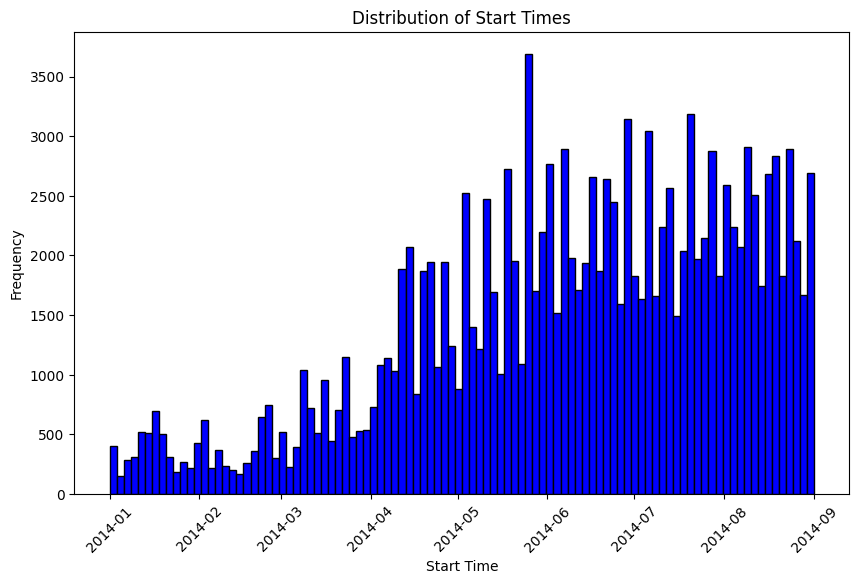

In [11]:
round_trip=df[(df['start station id'] == df['end station id'])]
round_trip["starttime"] = pd.to_datetime(round_trip["starttime"])

plt.figure(figsize=(10, 6))
plt.hist(round_trip['starttime'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.title('Distribution of Start Times')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_30529/1606824793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_station["starttime"] = pd.to_datetime(end_station["starttime"])


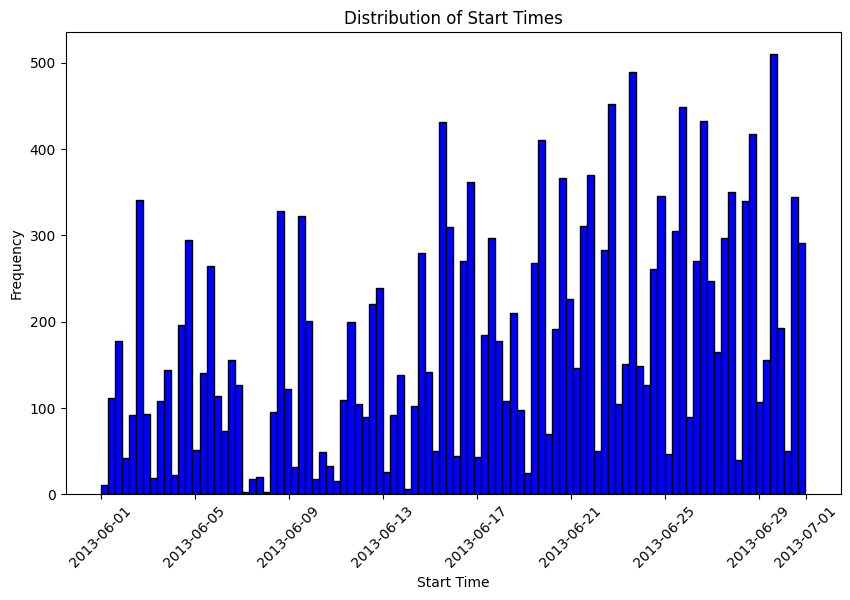

In [ ]:
end_station=df[df["end station name"].isna()== True]

end_station["starttime"] = pd.to_datetime(end_station["starttime"])

plt.figure(figsize=(10, 6))
plt.hist(end_station['starttime'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.title('Distribution of Start Times')
plt.xticks(rotation=45)
plt.show()

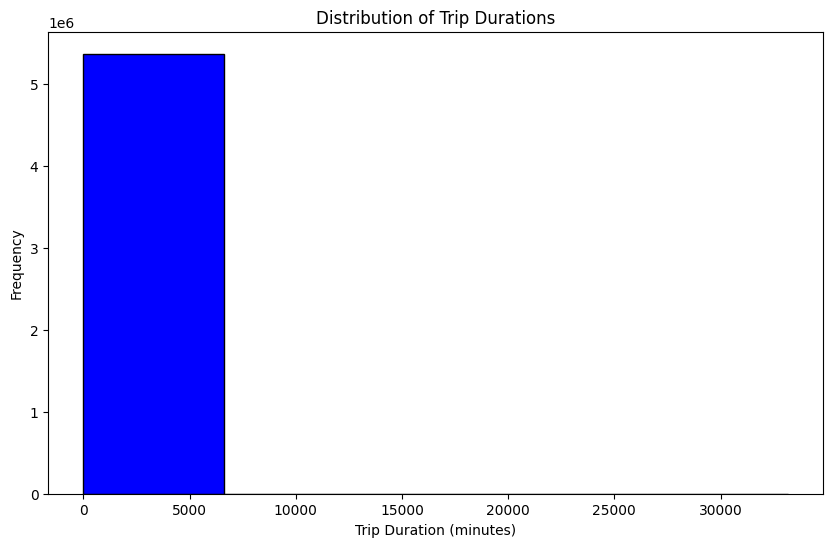

In [15]:
df['tripduration_minutes'] = df['tripduration'] / 60

# Plot the distribution of trip durations
plt.figure(figsize=(10, 6))
plt.hist(df['tripduration_minutes'], bins=5, color='blue', edgecolor='black')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

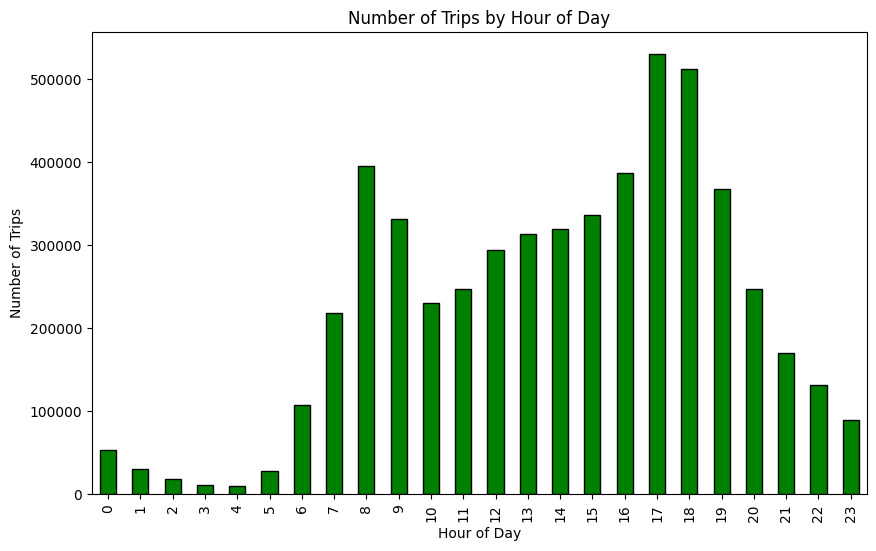

In [16]:
df['hour'] = df['starttime'].dt.hour

# Plot the number of trips by hour of day
plt.figure(figsize=(10, 6))
df['hour'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of Day')
plt.show()

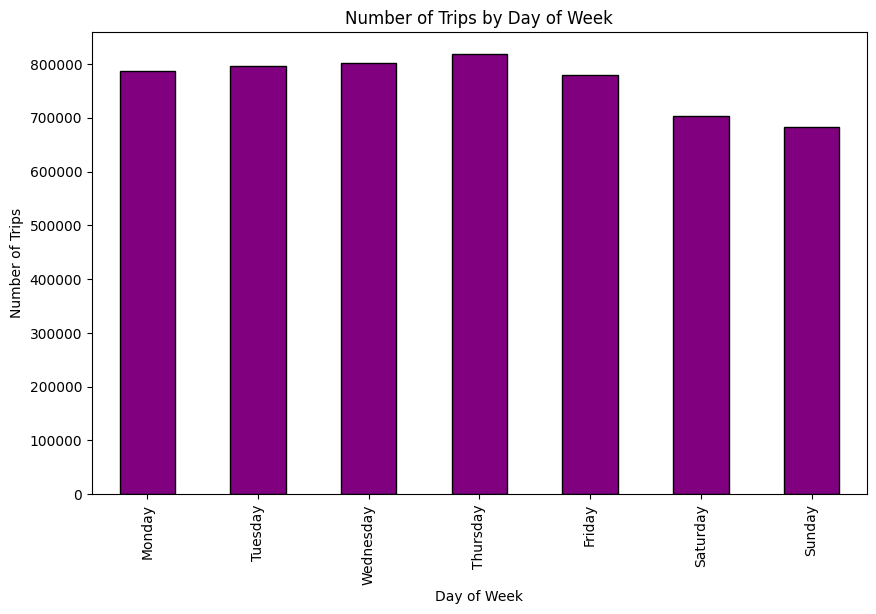

In [17]:
df['day_of_week'] = df['starttime'].dt.day_name()

# Plot the number of trips by day of week
plt.figure(figsize=(10, 6))
df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Day of Week')
plt.show()

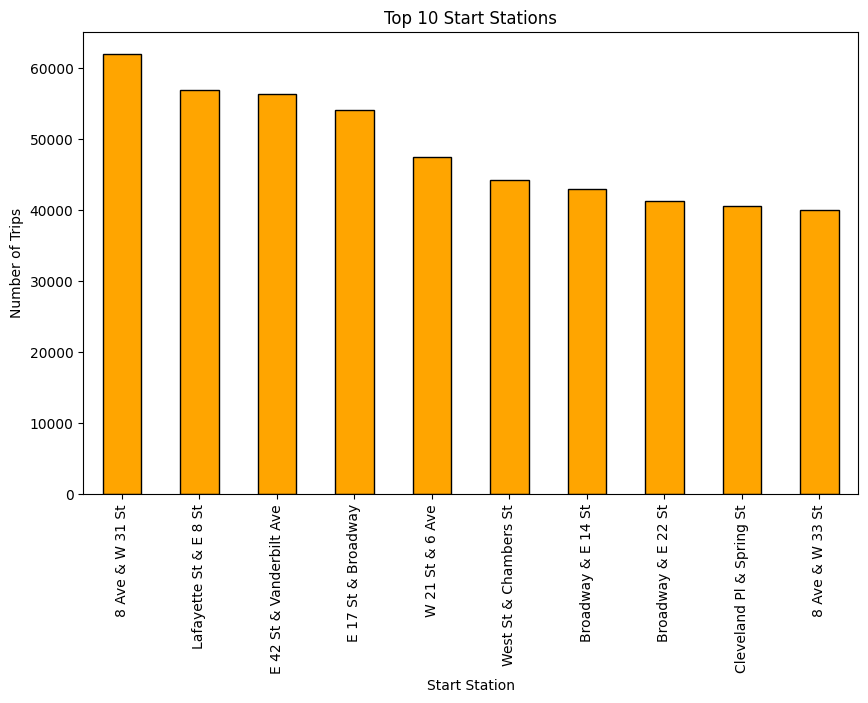

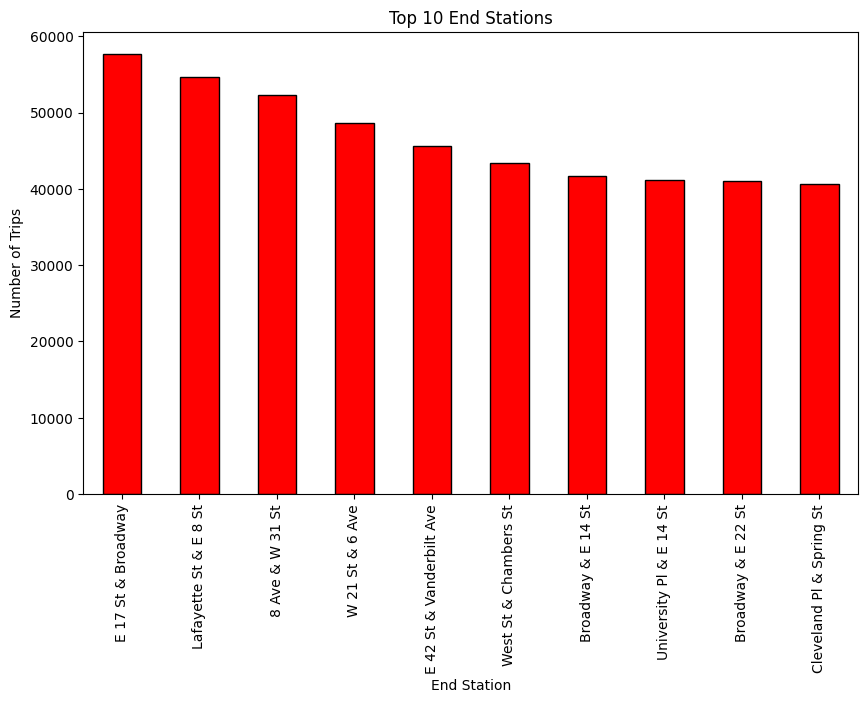

In [18]:
# Plot the most popular start stations
plt.figure(figsize=(10, 6))
df['start station name'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.title('Top 10 Start Stations')
plt.show()

# Plot the most popular end stations
plt.figure(figsize=(10, 6))
df['end station name'].value_counts().head(10).plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.title('Top 10 End Stations')
plt.show()

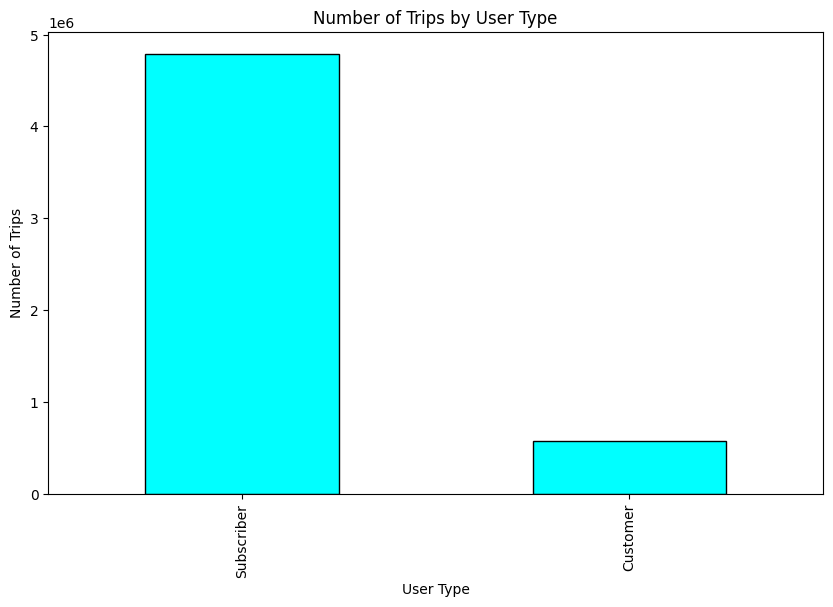

In [19]:
# Plot the number of trips by user type
plt.figure(figsize=(10, 6))
df['usertype'].value_counts().plot(kind='bar', color='cyan', edgecolor='black')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by User Type')
plt.show()

/tmp/ipykernel_709/118402230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Month'] = customers['starttime'].dt.to_period('M')


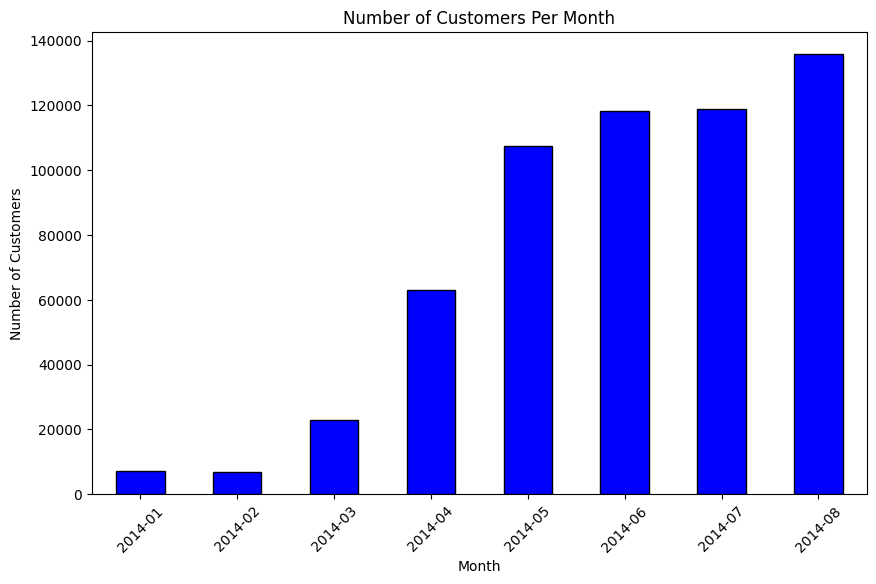

/tmp/ipykernel_709/118402230.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscriber['Month'] = subscriber['starttime'].dt.to_period('M')


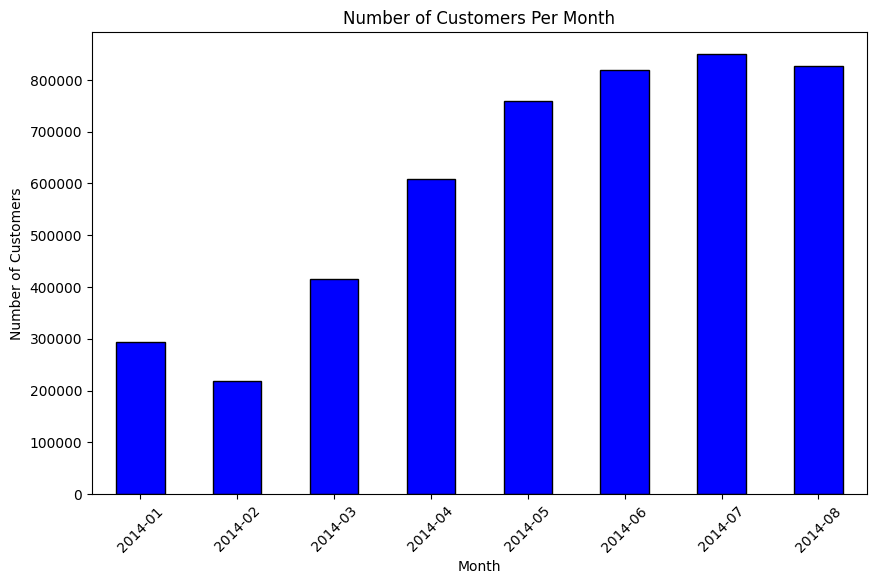

In [ ]:
# Filter for customers
customers = df[df['usertype'] == 'Customer']

# Group by month and count customers
customers['Month'] = customers['starttime'].dt.to_period('M')
customers_per_month = customers.groupby('Month').size()

# Plot the data
plt.figure(figsize=(10, 6))
customers_per_month.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Per Month')
plt.xticks(rotation=45)
plt.show()


# Filter for subscribers
subscriber = df[df['usertype'] == 'Subscriber']
#Group by month and count subscribers
subscriber['Month'] = subscriber['starttime'].dt.to_period('M')
subscriber_per_month = subscriber.groupby('Month').size()

# Plot the data
plt.figure(figsize=(10, 6))
subscriber_per_month.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Subscriber')
plt.title('Number of Subscriber')
plt.xticks(rotation=45)
plt.show()
